<a href="https://colab.research.google.com/github/amanii1213/Amani_Masar/blob/main/ProjAmay2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Section1,2**: Apply Data Cleaning Techniques and Process the data as possible.

#About Dataset This dataset encapsulates a detailed examination of market dynamics over a five-year period, focusing on the fluctuation of prices and trading volumes across a diversified portfolio. It covers various sectors including energy commodities like natural gas and crude oil, metals such as copper, platinum, silver, and gold, cryptocurrencies including Bitcoin and Ethereum, and key stock indices and companies like the S&P 500, Nasdaq 100, Apple, Tesla, Microsoft, Google, Nvidia, Berkshire Hathaway, Netflix, Amazon, and Meta Platforms. This dataset serves as a valuable resource for analyzing trends and patterns in global markets.

(((Because the data is large, it follows a normal distribution)))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [ ]:
stockUS = pd.read_csv('/content/Stock Market Dataset (2).csv')
stockUS.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
#get the column
stockUS.columns

Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')

In [ ]:
#rename columns
stockUS.rename(columns={'Date':'Date1'}, inplace=True)
stockUS

,Unnamed: 0,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,08-02-2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,07-02-2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,06-02-2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,05-02-2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [ ]:
#check the null (missing values)
stockUS.isnull()
d = 'Y'
dd= ' Y'
ddd= '  Y'
d_1 = ''

#check how many missing values
stockUS.isnull().sum()

Unnamed: 0             0
Date1                  0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

In [ ]:
#replace the missing value(s) with mean
stockUS['Silver_Vol.'] = stockUS['Silver_Vol.'].fillna(stockUS['Silver_Vol.'].mean())
stockUS['Platinum_Vol.'] = stockUS['Platinum_Vol.'].fillna(stockUS['Platinum_Vol.'].mean())
stockUS['Crude_oil_Vol.'] = stockUS['Crude_oil_Vol.'].fillna(stockUS['Crude_oil_Vol.'].mean())
stockUS['Natural_Gas_Vol.'] = stockUS['Natural_Gas_Vol.'].fillna(stockUS['Natural_Gas_Vol.'].mean())
stockUS['Gold_Vol.'] = stockUS['Gold_Vol.'].fillna(stockUS['Gold_Vol.'].mean())

#check how many missing values
stockUS.isnull().sum()

Unnamed: 0            0
Date1                 0
Natural_Gas_Price     0
Natural_Gas_Vol.      0
Crude_oil_Price       0
Crude_oil_Vol.        0
Copper_Price          0
Copper_Vol.          37
Bitcoin_Price         0
Bitcoin_Vol.          0
Platinum_Price        0
Platinum_Vol.         0
Ethereum_Price        0
Ethereum_Vol.         0
S&P_500_Price         0
Nasdaq_100_Price      0
Nasdaq_100_Vol.       1
Apple_Price           0
Apple_Vol.            0
Tesla_Price           0
Tesla_Vol.            0
Microsoft_Price       0
Microsoft_Vol.        0
Silver_Price          0
Silver_Vol.           0
Google_Price          0
Google_Vol.           0
Nvidia_Price          0
Nvidia_Vol.           0
Berkshire_Price       0
Berkshire_Vol.        0
Netflix_Price         0
Netflix_Vol.          0
Amazon_Price          0
Amazon_Vol.           0
Meta_Price            0
Meta_Vol.             0
Gold_Price            0
Gold_Vol.             0
dtype: int64

In [ ]:
# Convert 'Bitcoin_Price' and 'Berkshire_Price' and 'Gold_Price' removing commas

stockUS['Berkshire_Price'] = stockUS['Berkshire_Price'].str.replace(',', '').astype(float)
stockUS['Gold_Price'] = stockUS['Gold_Price'].str.replace(',', '').astype(float)

stockUS.head()

,Unnamed: 0,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,131624.116223,72.28,398903.778689,3.8215,NaN,"43,194.70",42650.0,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,211127.671233
1,1,01-02-2024,2.050,161340.000000,73.82,577940.000000,3.8535,NaN,"43,081.40",47690.0,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.000000
2,2,31-01-2024,2.100,142860.000000,75.85,344490.000000,3.9060,NaN,"42,580.50",56480.0,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.000000
3,3,30-01-2024,2.077,139750.000000,77.82,347240.000000,3.9110,NaN,"42,946.20",55130.0,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.000000
4,4,29-01-2024,2.490,3590.000000,76.78,331930.000000,3.8790,NaN,"43,299.80",45230.0,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.000000


In [ ]:
#Add New clum

stockUS['StockAmay'] = stockUS['Gold_Price'] * 2
stockUS

,Unnamed: 0,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,StockAmay
0,0,02-02-2024,2.079,131624.116223,72.28,398903.778689,3.8215,NaN,"43,194.70",42650.0,...,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,211127.671233,4107.4
1,1,01-02-2024,2.050,161340.000000,73.82,577940.000000,3.8535,NaN,"43,081.40",47690.0,...,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.000000,4142.2
2,2,31-01-2024,2.100,142860.000000,75.85,344490.000000,3.9060,NaN,"42,580.50",56480.0,...,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.000000,4134.8
3,3,30-01-2024,2.077,139750.000000,77.82,347240.000000,3.9110,NaN,"42,946.20",55130.0,...,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.000000,4101.8
4,4,29-01-2024,2.490,3590.000000,76.78,331930.000000,3.8790,NaN,"43,299.80",45230.0,...,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.000000,4069.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,08-02-2019,2.583,147880.000000,52.72,621000.000000,2.8140,270.0,"3,661.70",699230.0,...,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,1318.5,150610.000000,2637.0
1239,1239,07-02-2019,2.551,211790.000000,52.64,749010.000000,2.8320,320.0,"3,397.70",471360.0,...,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,1314.2,166760.000000,2628.4
1240,1240,06-02-2019,2.662,98330.000000,54.01,606720.000000,2.8400,100.0,"3,404.30",514210.0,...,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,1314.4,137250.000000,2628.8
1241,1241,05-02-2019,2.662,82250.000000,53.66,609760.000000,2.8205,90.0,"3,468.40",460950.0,...,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,1319.2,129010.000000,2638.4


In [ ]:
# Drop the 'Copper_Vol.' column
stockUS.drop('Copper_Vol.', axis=1, inplace=True)
stockUS.head()

,Unnamed: 0,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,StockAmay
0,0,02-02-2024,2.079,131624.116223,72.28,398903.778689,3.8215,"43,194.70",42650.0,901.6,...,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,211127.671233,4107.4
1,1,01-02-2024,2.050,161340.000000,73.82,577940.000000,3.8535,"43,081.40",47690.0,922.3,...,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.000000,4142.2
2,2,31-01-2024,2.100,142860.000000,75.85,344490.000000,3.9060,"42,580.50",56480.0,932.6,...,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.000000,4134.8
3,3,30-01-2024,2.077,139750.000000,77.82,347240.000000,3.9110,"42,946.20",55130.0,931.7,...,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.000000,4101.8
4,4,29-01-2024,2.490,3590.000000,76.78,331930.000000,3.8790,"43,299.80",45230.0,938.3,...,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.000000,4069.8


In [ ]:
#dropping the missing values
stockUS_new = stockUS.dropna()
stockUS.info()
stockUS_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date1              1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1243 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1243 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      1243 non-null   float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

In [ ]:
#Descriptive characteristics
stockUS_new.describe()


,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,Nasdaq_100_Vol.,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,StockAmay
count,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03,1242.000000,1.242000e+03,1242.000000,1.242000e+03,1.242000e+03,...,1242.000000,1242.000000,1.242000e+03,1242.000000,1.242000e+03,1242.000000,1.242000e+03,1242.000000,1242.000000,1242.000000
mean,621.435588,3.494810,131562.380407,67.561924,3.988747e+05,3.541873,4.037163e+07,9082.515723,1.802983e+07,2.238827e+08,...,2420.893720,404.854750,7.060427e+06,128.683575,7.415852e+07,239.664823,2.325912e+07,1759.162158,211146.453577,3518.324316
std,358.783316,1.823272,64270.397359,20.466780,2.142348e+05,0.703096,2.942051e+08,6349.574413,1.327459e+08,8.246992e+07,...,2654.149308,115.034542,6.385868e+06,30.821039,3.245507e+07,71.008932,1.556111e+07,203.318892,114958.097050,406.637784
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,2.600000e+02,0.000000,7.518000e+04,5.047000e+07,...,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,1272.000000,0.000000,2544.000000
25%,311.250000,2.346250,92120.000000,55.092500,2.857000e+05,2.857625,7.922000e+04,5532.500000,5.885500e+05,1.715275e+08,...,342.500000,323.000000,3.990000e+06,96.230000,5.266000e+07,183.317500,1.478250e+07,1669.400000,152207.500000,3338.800000
50%,621.500000,2.701500,127570.000000,69.220000,3.682950e+05,3.666250,2.161950e+05,9082.515723,1.575000e+06,2.116200e+08,...,1510.000000,383.970000,5.610000e+06,128.755000,6.521000e+07,224.010000,1.933500e+07,1804.150000,198010.000000,3608.300000
75%,931.750000,4.055750,169237.500000,80.447500,5.021450e+05,4.138125,6.155025e+05,9082.515723,9.372500e+06,2.559850e+08,...,3217.500000,495.507500,7.910000e+06,158.110000,8.675750e+07,301.597500,2.711750e+07,1913.100000,257885.000000,3826.200000
max,1242.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,4.470000e+09,42830.000000,1.790000e+09,9.825600e+08,...,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.000000,4179.400000


In [ ]:
#max value
stockUS_new['Natural_Gas_Price'].max()

9.647

In [ ]:
#Show values that we specify for a specific variable
stockUS_new[stockUS_new.Natural_Gas_Price > 9.3]

,Unnamed: 0,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,StockAmay
358,358,29-08-2022,9.353,1200.0,97.01,283460.0,3.6140,"20,295.80",248040.0,855.8,...,3170.0,224.57,7110000.0,129.79,48100000.0,159.17,20050000.0,1749.7,156220.0,3499.4
360,360,25-08-2022,9.375,25830.0,92.52,279880.0,3.6965,"21,565.40",190150.0,878.1,...,2180.0,233.98,3770000.0,137.28,37500000.0,168.78,15460000.0,1771.4,117570.0,3542.8
363,363,22-08-2022,9.647,60480.0,90.23,24870.0,3.6565,"21,416.30",251830.0,869.4,...,3610.0,226.54,8630000.0,133.22,50460000.0,163.05,19500000.0,1748.4,142860.0,3496.8
364,364,19-08-2022,9.336,69810.0,90.77,58710.0,3.6765,"20,831.30",339470.0,889.4,...,2660.0,241.16,7500000.0,138.23,47790000.0,167.96,26240000.0,1762.9,138700.0,3525.8
367,367,16-08-2022,9.329,104090.0,86.53,305370.0,3.6375,"23,856.80",201700.0,932,...,2740.0,245.69,5140000.0,144.78,59100000.0,179.47,21160000.0,1789.7,94400.0,3579.4
414,414,06-06-2022,9.322,129100.0,118.50,246830.0,4.4530,"31,367.60",94010.0,"1,031.50",...,2000.0,197.14,5370000.0,124.79,135270000.0,194.25,30570000.0,1843.7,103180.0,3687.4


In [ ]:
#check for duplicate values
stockUS_new.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1238    False
1239    False
1240    False
1241    False
1242    False
Length: 1242, dtype: bool

In [ ]:
del stockUS['Unnamed: 0']
stockUS.head()

,Date1,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,StockAmay
0,02-02-2024,2.079,131624.116223,72.28,398903.778689,3.8215,"43,194.70",42650.0,901.6,9082.515723,...,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,211127.671233,4107.4
1,01-02-2024,2.050,161340.000000,73.82,577940.000000,3.8535,"43,081.40",47690.0,922.3,9082.515723,...,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.000000,4142.2
2,31-01-2024,2.100,142860.000000,75.85,344490.000000,3.9060,"42,580.50",56480.0,932.6,9082.515723,...,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.000000,4134.8
3,30-01-2024,2.077,139750.000000,77.82,347240.000000,3.9110,"42,946.20",55130.0,931.7,9082.515723,...,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.000000,4101.8
4,29-01-2024,2.490,3590.000000,76.78,331930.000000,3.8790,"43,299.80",45230.0,938.3,9082.515723,...,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.000000,4069.8


In [ ]:
#remove duplication
stockUS_new = stockUS.drop_duplicates()
#saving the new dataframe into a csv file
stockUS_new.to_csv('thestock_clean_dia.csv')

#**Section3** :Data visualization.

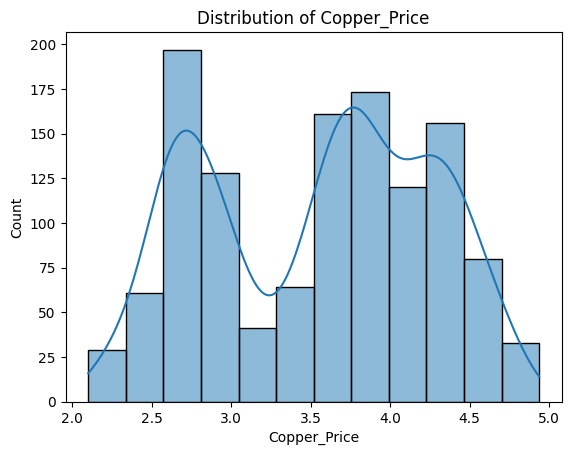

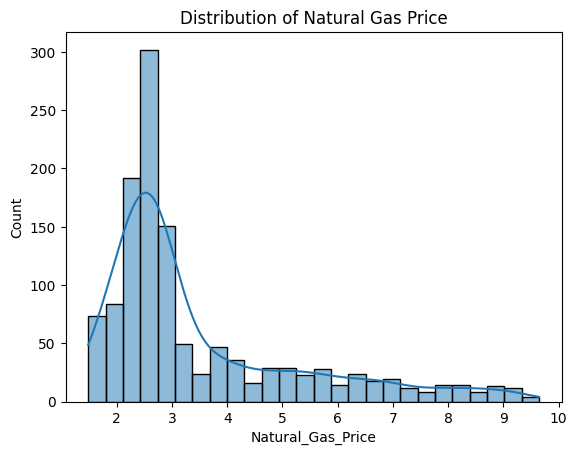

In [ ]:
# Histogram of a specific variable (Copper_Price)
sns.histplot(stockUS['Copper_Price'], kde=True)
plt.title('Distribution of Copper_Price')
plt.show()


# Histogram of a specific variable'Natural_Gas_Price'
sns.histplot(stockUS['Natural_Gas_Price'], kde=True)
plt.title('Distribution of Natural Gas Price')
plt.show()

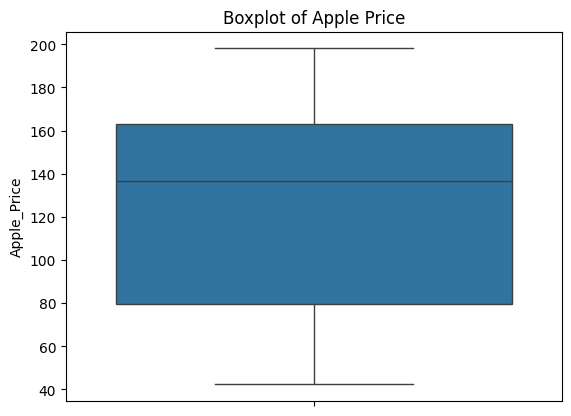

In [ ]:
# Boxplot for another variable('Bitcoin_Price')

sns.boxplot(y=stockUS['Apple_Price'])
plt.title('Boxplot of Apple Price')
plt.show()

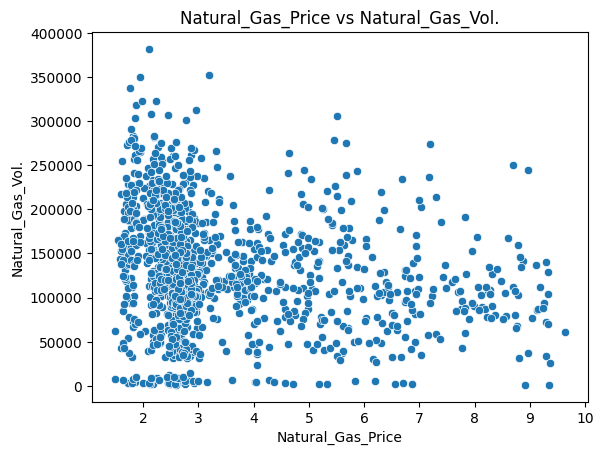

In [ ]:
# Scatter plot between two variables'Natural_Gas_Price' and 'Natural_Gas_Vol.'

sns.scatterplot(x=stockUS['Natural_Gas_Price'], y=stockUS['Natural_Gas_Vol.'])
plt.title('Natural_Gas_Price vs Natural_Gas_Vol.')
plt.show()

<ipython-input-83-e48e24e9dbf8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stockUS.corr()


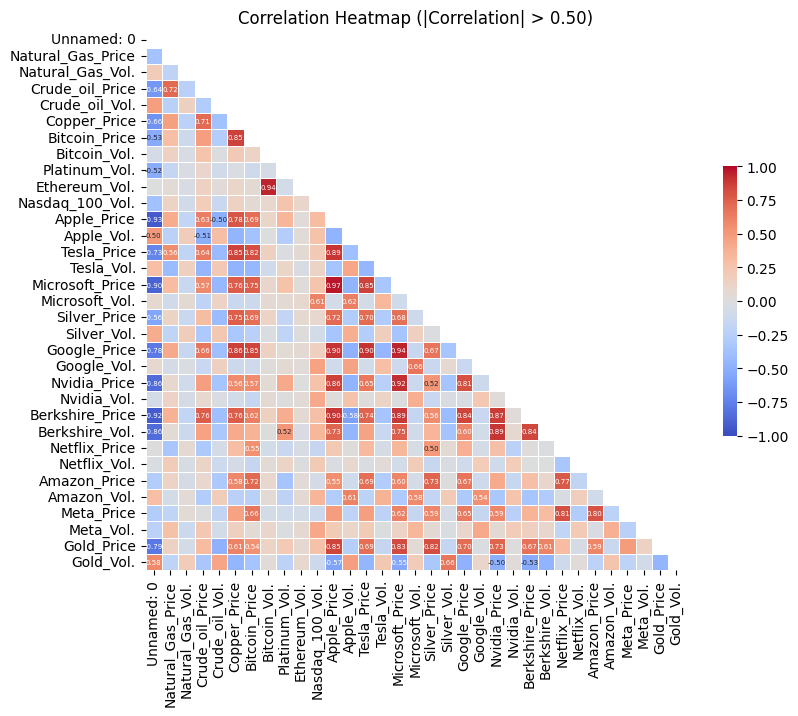

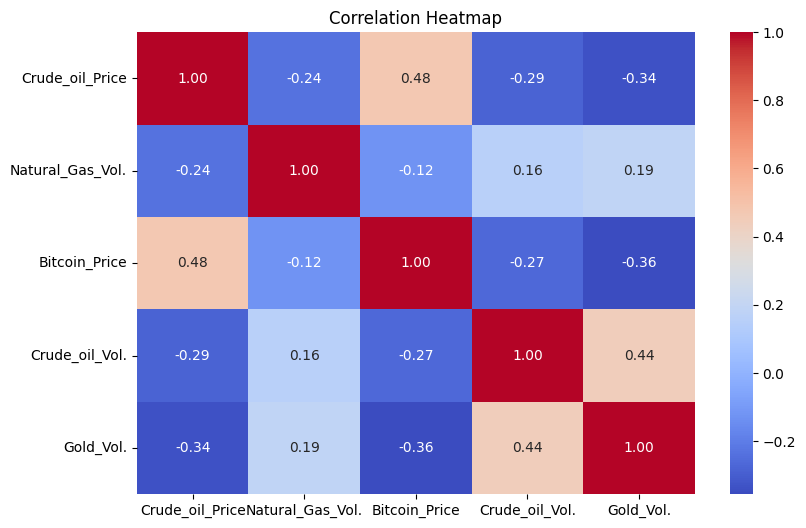

In [ ]:
# Compute the correlation matrix
corr_matrix = stockUS.corr()

# Increase the figure size for better visibility
plt.figure(figsize=(10, 7))

# Create a mask to display only correlations > 0.50 or < -0.50
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
# Decrease the annotation font size by adjusting `annot_kws`

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 5})

# Annotate only values with absolute value > 0.50
for text in plt.gca().texts:
    t = float(text.get_text())
    if abs(t) < 0.50:
        text.set_text('')


plt.title('Correlation Heatmap (|Correlation| > 0.50)')
plt.show()

#other Heatmap using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(stockUS[['Crude_oil_Price','Natural_Gas_Vol.', 'Bitcoin_Price','Crude_oil_Vol.', 'Gold_Vol.']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

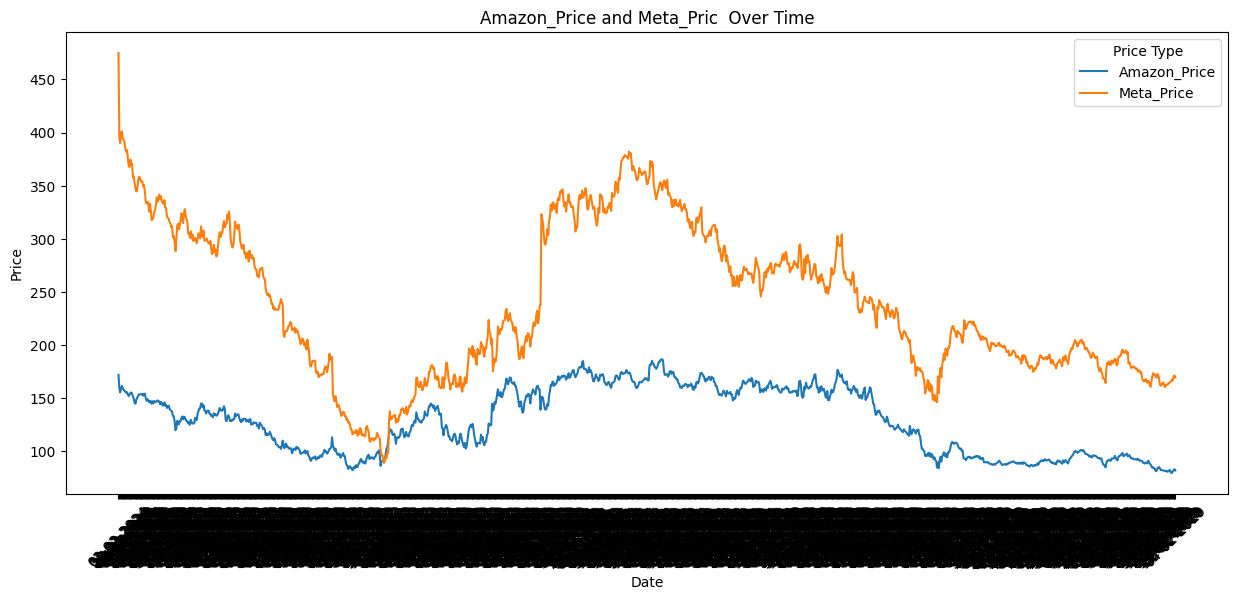

In [ ]:
# Reshape the DataFrame
ss = pd.melt(stockUS, id_vars=['Date'], value_vars=['Amazon_Price', 'Meta_Price'],
                  var_name='Type', value_name='Price')

# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=ss, x='Date', y='Price', hue='Type')
plt.title('Amazon_Price and Meta_Pric  Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')

plt.show()

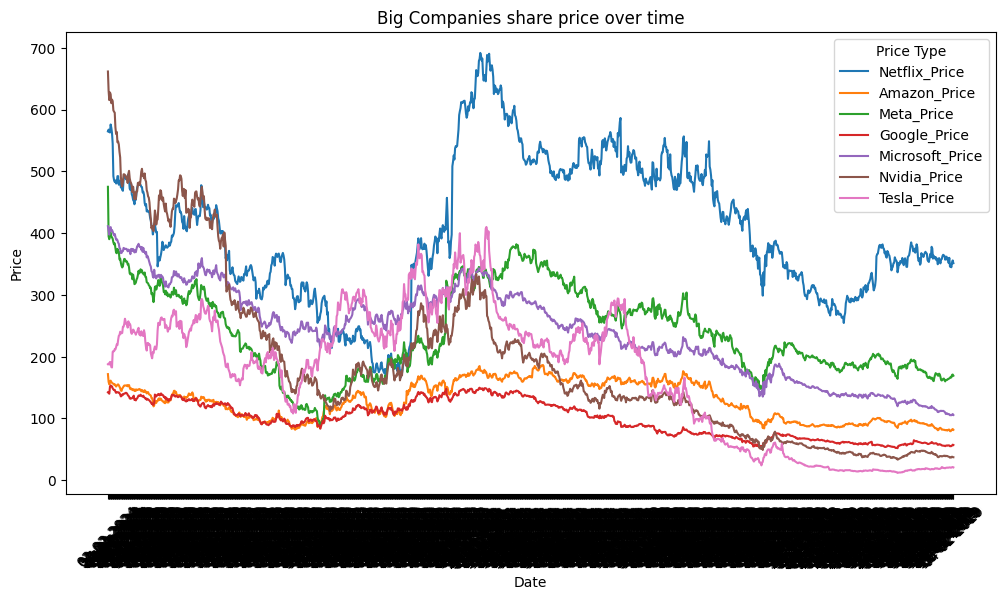

In [ ]:
# Reshape the DataFrame to long format
SSs = pd.melt(stockUS, id_vars=['Date'], value_vars=['Netflix_Price' , 'Amazon_Price' , 'Meta_Price' , 'Google_Price' , 'Microsoft_Price' , 'Nvidia_Price' , 'Tesla_Price'],
                  var_name='Type', value_name='Price')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data= SSs , x='Date', y='Price', hue='Type')
plt.title('Big Companies share price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.show()

   .. شكرا